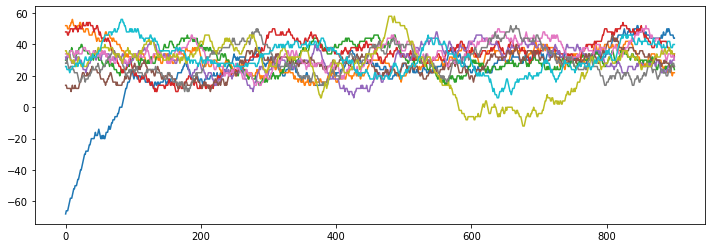

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import gym
env = gym.make("FrozenLake-v0", is_slippery=True)
alpha=0.1
epsilon=1.0
decay=0.9
gamma=0.95
max_episode=1000
M=10
Q=np.zeros([env.observation_space.n,env.action_space.n])
Q_=np.copy(Q)
end_rewards=np.zeros((max_episode,M))
N=1
#D:(s,a,r,s_)
D=np.zeros((N,4)).astype(int)
plt.figure(figsize=(12,4))
for m in range(M):
    for episode in range(max_episode):
        s=env.reset()
        done=False
        for t in range(100):
            if np.random.rand()<epsilon:
                a=env.action_space.sample()
            else:
                a=np.argmax(Q[s,:])
            s_,reward,done,_=env.step(a)
            if done:#reaching goal or falling into a hole
                r = 1.0 if reward > 0.0 else -1.0
            else:#reaching maximum step
                r = 0.0
    #        Q_[s,a]=(1-alpha)*Q[s,a]+alpha*(r+gamma*np.max(Q_[s_,:]))
            D[np.random.randint(N),:]=[s,a,r,s_]
            for i in range(N):
                s,a,r,s_=D[i,:]
                Q_[s,a]=(1-alpha)*Q[s,a]+alpha*(r+gamma*np.max(Q[s_,:]))
            if t%100==0:
                Q=np.copy(Q_)
            if done:
                break
            s=s_
            epsilon=epsilon*decay
        end_rewards[episode,m]=r
    #plt.plot(np.arange(max_episode),end_rewards[:,m],'.')
    plt.plot(np.convolve(np.ones(100),end_rewards[:,m],"valid"),'-')

# for i in range(100):
#     s=env.reset()
#     a=np.argmax(Q[s,:])
#     s_,r,done,_=env.step(a)
#     env.render()
#     if done:
#         break

In [2]:
D

array([[14,  2,  1, 15]])

In [3]:
Q

array([[ 3.06518513e-01, -7.15313955e-02, -6.81105199e-02,
        -6.96157585e-02],
       [-2.71000000e-01, -2.71000000e-01, -2.71000000e-01,
         3.18424343e-01],
       [-2.80428389e-01, -2.80896245e-01, -2.92633543e-01,
         2.27908690e-01],
       [-3.43900000e-01, -3.41969437e-01, -3.43900000e-01,
         9.11647669e-02],
       [ 3.22978151e-01, -2.71000000e-01, -2.61262504e-01,
        -2.62900000e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-8.33464696e-01, -8.36371544e-01, -4.95913024e-01,
        -8.43357353e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.90000000e-01, -1.90000000e-01, -1.90000000e-01,
         3.83626497e-01],
       [-1.90000000e-01,  4.76257148e-01, -1.90000000e-01,
        -1.90000000e-01],
       [ 2.64975835e-01, -4.49585891e-01, -4.53543517e-01,
        -4.17354643e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
      

LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

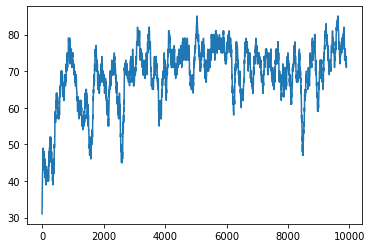

In [151]:
Q= np.zeros((env.observation_space.n, env.action_space.n)) #16x4
alpha=0.1
beta=0.001
gamma=0.95
num_episodes = 1000
reward_list=[]
for i in range(num_episodes):
    s = env.reset();
    done=False
    while done==False:
        if np.random.rand() < beta:
            a = np.random.randint(env.action_space.n)
        else:
            a = np.argmax(Q[s,:] )
        s_next,reward,done,info = env.step(a)
        if done:#reaching goal or falling into a hole
            r = 1.0 if reward > 0.0 else -1.0
        else:#reaching maximum step
            r = 0.0
        Q[s,a]= (1-alpha)*Q[s,a] + alpha*( r + gamma*np.max(Q[s_next,:]) )
        if done == True:
            break
        s=s_next
    reward_list.append(reward)
                                        
plt.plot(np.convolve(np.ones(100),reward_list,"valid"))

In [82]:
s_=env.reset()
for t in range(10000):
    s_,r,done,_=env.step(1)
    print(t,s_,r,done)
    if done:
        pass
        #s_=env.reset()

0 1 0.0 False
1 2 0.0 False
2 6 0.0 False
3 10 0.0 False
4 11 0.0 True
5 11 0 True
6 11 0 True
7 11 0 True
8 11 0 True
9 11 0 True
10 11 0 True
11 11 0 True
12 11 0 True
13 11 0 True
14 11 0 True
15 11 0 True
16 11 0 True
17 11 0 True
18 11 0 True
19 11 0 True
20 11 0 True
21 11 0 True
22 11 0 True
23 11 0 True
24 11 0 True
25 11 0 True
26 11 0 True
27 11 0 True
28 11 0 True
29 11 0 True
30 11 0 True
31 11 0 True
32 11 0 True
33 11 0 True
34 11 0 True
35 11 0 True
36 11 0 True
37 11 0 True
38 11 0 True
39 11 0 True
40 11 0 True
41 11 0 True
42 11 0 True
43 11 0 True
44 11 0 True
45 11 0 True
46 11 0 True
47 11 0 True
48 11 0 True
49 11 0 True
50 11 0 True
51 11 0 True
52 11 0 True
53 11 0 True
54 11 0 True
55 11 0 True
56 11 0 True
57 11 0 True
58 11 0 True
59 11 0 True
60 11 0 True
61 11 0 True
62 11 0 True
63 11 0 True
64 11 0 True
65 11 0 True
66 11 0 True
67 11 0 True
68 11 0 True
69 11 0 True
70 11 0 True
71 11 0 True
72 11 0 True
73 11 0 True
74 11 0 True
75 11 0 True
76 11 0 Tru

In [146]:
np.random.randint(1)

0

In [148]:
for i in range(1):
    print(i)

0
